# Exercise 10.1

The traveling salesman optimization problem can be embedded in a statistical mechanics annealing problem. We interpret the cost function  $
C(x)=L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$ as the energy of a statistical mechanics system and consider the Boltzmann distribution: $p(x)=exp[-\beta C(x)]$.

The idea is to establish an annealing schedule: $$\{(\beta_1,n_1),(\beta_2,n_2), \dots , (\beta_N,n_N)\}$$ We simulate the system for $n_1$ Monte Carlo steps at temperature $\beta_1$ and than we lower the temperature gradually. Which kind of schedule do we choose? A good choice is a geometric annealing schedule of this kind: $$\{(\beta_1,n),(\beta_2=\alpha\cdot \beta_1,n), \dots , (\beta_N=\alpha\cdot\beta_{N-1} ,n)\}$$ In the present simulation we used $n=1000$, $\alpha=1.1$ and $N=100$.   At the end the system will be frozen in the ground state that minimizes the energy $C(x)$. We use the Metropolis Monte Carlo algorithm to sample the Boltzmann distribution:
- a move consists in inverting the order of a sequence of $m$ contiguous cities where $m$ is chosen randomly. We could also choose as a move to use all the mutations implemented in the Genetic Algorithm with their probabilities. I use this particular move because it works pretty well.
- the acceptance probability is $A(x|y)=min\big(1,e^{-\beta(C(x)-C(y))}\big)$

We applied our code to the optimization of a path among 

- 30 cities randomly placed **on** a circumference
- 30 cities randomly placed **inside** a square

In both cases we show:
- a picture of the current path length as a function of the iteration of the algorithm
- a picture of the best path

### Cities on a circumference with $r=1$

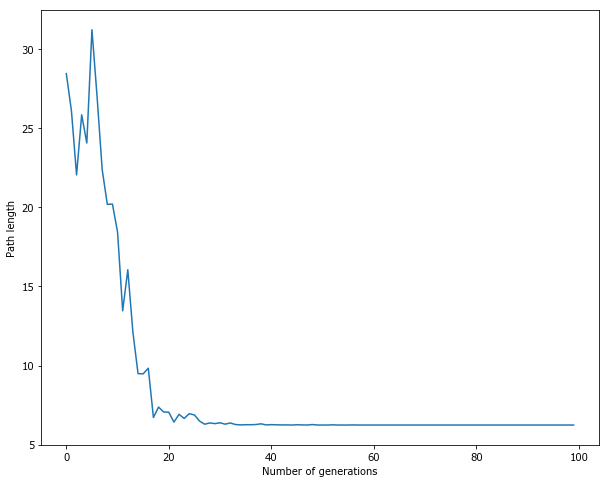

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

igen, path = np.loadtxt("Ex_10.1/Figures/Circ_Path.txt", usecols=(0,1,), delimiter='\t', unpack='true')  

plt.figure(figsize=(10,8))
plt.plot(igen, path)
plt.xlabel('Number of generations')
plt.ylabel('Path length')

plt.show()

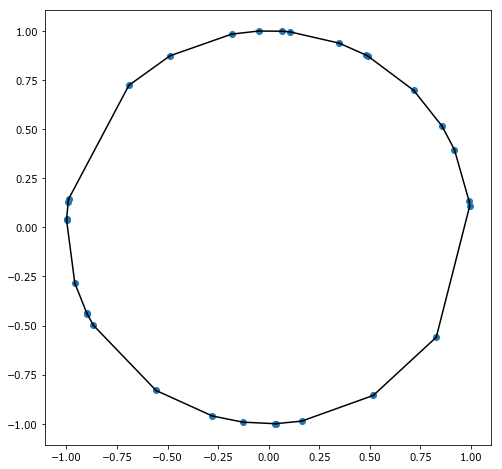

In [6]:
def connectpoints(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],'k-')

a, b =np.loadtxt("Ex_10.1/Figures/Circ_BestPath.txt", dtype=int, usecols=(0,1), delimiter='\t', unpack='true')
x, y = np.loadtxt("Ex_10.1/Figures/Circ_Map.txt", usecols=(1,2), delimiter='\t', unpack='true')  # compute graph layout

plt.figure(figsize=(8,8))
plt.scatter(x,y)


for i in range(len(a)):
    tmp1=a[i]
    tmp2=b[i]
    connectpoints(x[tmp1],y[tmp1],x[tmp2],y[tmp2])

plt.show()

### Cities inside a square with $L=1$

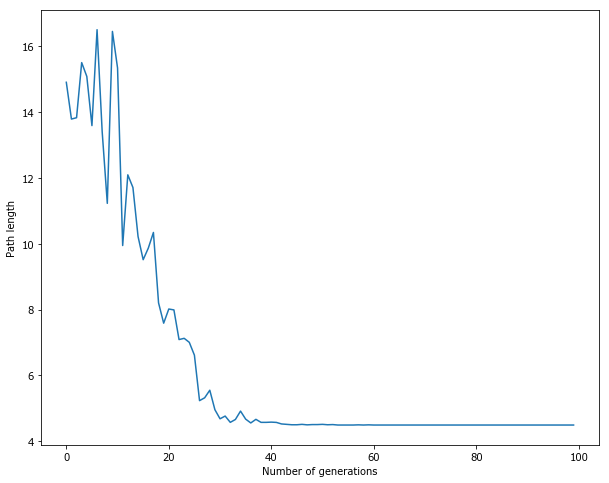

In [7]:
igen, path = np.loadtxt("Ex_10.1/Figures/Sq_Path.txt", usecols=(0,1,), delimiter='\t', unpack='true')  

plt.figure(figsize=(10,8))
plt.plot(igen, path)
plt.xlabel('Number of generations')
plt.ylabel('Path length')

plt.show()

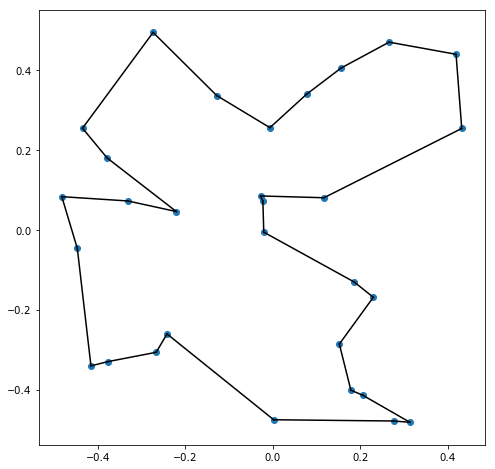

In [8]:
a, b =np.loadtxt("Ex_10.1/Figures/Sq_BestPath.txt", dtype=int, usecols=(0,1), delimiter='\t', unpack='true')
x, y = np.loadtxt("Ex_10.1/Figures/Sq_Map.txt", usecols=(1,2), delimiter='\t', unpack='true')  # compute graph layout

plt.figure(figsize=(8,8))
plt.scatter(x,y)


for i in range(len(a)):
    tmp1=a[i]
    tmp2=b[i]
    connectpoints(x[tmp1],y[tmp1],x[tmp2],y[tmp2])

plt.show()

The algorithm is very fast and efficient and can be used to optimize a traveling salesman problem with a bigger number of city, say $80$. We show the plot corresponding to this case.

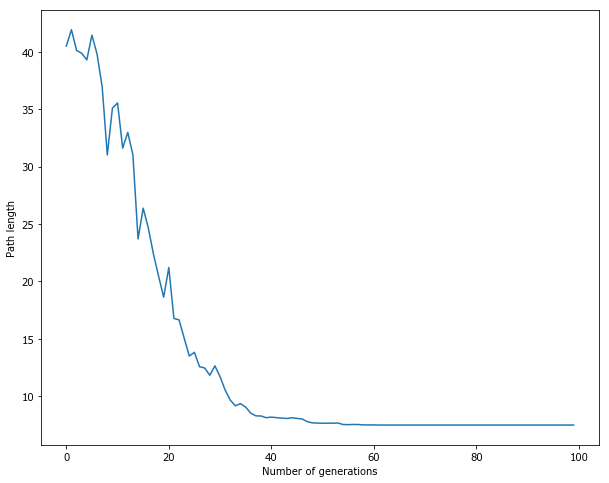

In [11]:
igen, path = np.loadtxt("Ex_10.1/Figures/80Path.txt", usecols=(0,1,), delimiter='\t', unpack='true')  

plt.figure(figsize=(10,8))
plt.plot(igen, path)
plt.xlabel('Number of generations')
plt.ylabel('Path length')

plt.show()

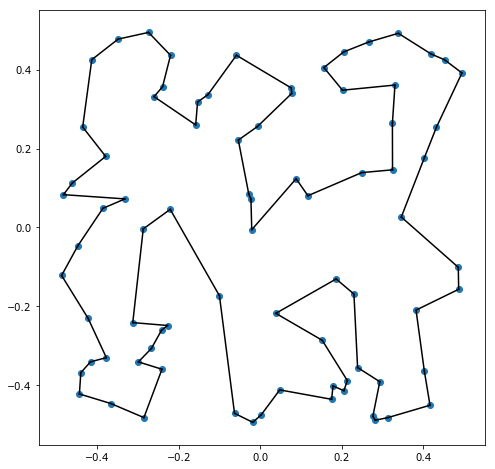

In [12]:
a, b =np.loadtxt("Ex_10.1/Figures/80BestPath.txt", dtype=int, usecols=(0,1), delimiter='\t', unpack='true')
x, y = np.loadtxt("Ex_10.1/Figures/80Map.txt", usecols=(1,2), delimiter='\t', unpack='true')  # compute graph layout

plt.figure(figsize=(8,8))
plt.scatter(x,y)


for i in range(len(a)):
    tmp1=a[i]
    tmp2=b[i]
    connectpoints(x[tmp1],y[tmp1],x[tmp2],y[tmp2])

plt.show()

# Exercise 10.2

We implemented a parallel Simulated Annealing code using MPI libraries, in order to solve the traveling salesman problem. In particular we perform the optimization starting from different random initial path. Each node uses a differently initialized pseudo random numbers generator. At the end of the computation we compare the final path lengths with the function *MPI_Allreduce* and we print to standard output the length of the best path and the rank of the relative node. Parallelizing the code is very useful in order to avoid local minima.

Let's apply our code to a TSP with $80$ cities randomly placed on a circumference of unitary radius. The parameters that characterize the annealing schedule are $n=100$, $\alpha=1.1$ and $N=100$. We plot a picture of the current path length as a function of the iteration of the algorithm, for each of the $4$ different nodes.
Furthermore we plot the shortest among the $4$ final paths.

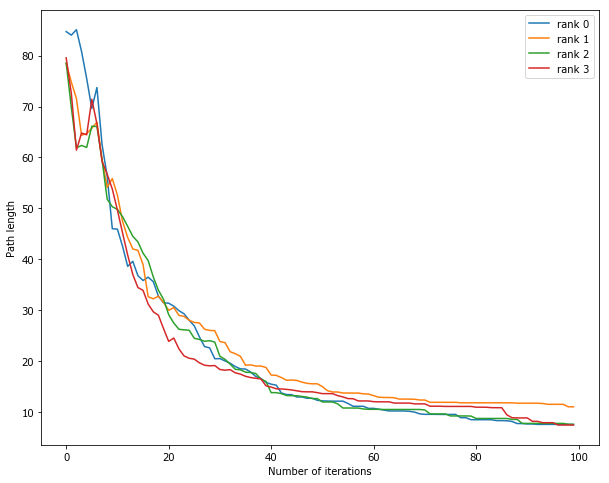

In [13]:
it, path_0 = np.loadtxt("Ex_10.2/Pictures/Path0.txt", usecols=(0,1,), delimiter='\t', unpack='true')  
path_1 = np.loadtxt("Ex_10.2/Pictures/Path1.txt", usecols=(1), delimiter='\t', unpack='true')  
path_2 = np.loadtxt("Ex_10.2/Pictures/Path2.txt", usecols=(1), delimiter='\t', unpack='true')  
path_3 = np.loadtxt("Ex_10.2/Pictures/Path3.txt", usecols=(1), delimiter='\t', unpack='true')  

plt.figure(figsize=(10,8))
plt.plot(it, path_0, label='rank 0')
plt.plot(it, path_1, label='rank 1')
plt.plot(it, path_2, label='rank 2')
plt.plot(it, path_3, label='rank 3')
plt.xlabel('Number of iterations')
plt.ylabel('Path length')

plt.legend()
plt.show()

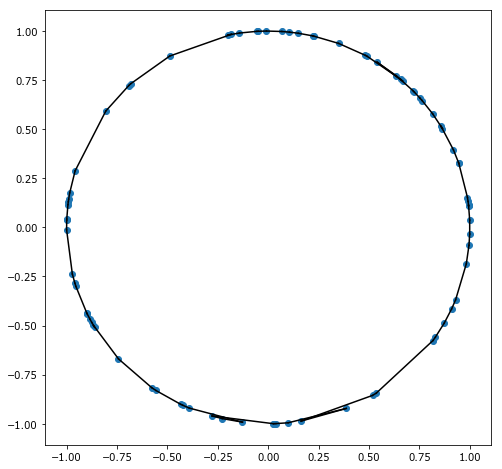

In [15]:
a, b =np.loadtxt("Ex_10.2/Pictures/BestPath_3.txt", dtype=int, usecols=(0,1), delimiter='\t', unpack='true')
x, y = np.loadtxt("Ex_10.2/Pictures/Map.txt", usecols=(1,2), delimiter='\t', unpack='true')  # compute graph layout

plt.figure(figsize=(8,8))
plt.scatter(x,y)


for i in range(len(a)):
    tmp1=a[i]
    tmp2=b[i]
    connectpoints(x[tmp1],y[tmp1],x[tmp2],y[tmp2])

plt.show()